<div style="text-align: center; color:rgb(0, 0, 0); font-family: Arial, sans-serif; background-color:rgb(137, 200, 129); padding: 10px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 1.2); line-height: 0.1;">

### **Series de Tiempo**
#### **Universidad Central**
#### Maestría en Analítica de Datos
#### Docente: Wilson Sandoval Rodriguez
##### wsandovalr@ucentral.edu.co

</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

<div style=" font-family: Arial, sans-serif; background-color:rgba(83, 52, 196, 0.2); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

### **Remuestreo**

El remuestreo consiste básicamente en representar los datos con una frecuencia diferente. Supongamos que tenemos un sensor de temperatura que toma mediciones cada minuto. Si no necesitamos una precisión de minutos, podemos promediar las mediciones de 60 minutos en una hora y mostrar los cambios de temperatura cada hora. Esto se conoce como submuestreo, es decir, convertir a una frecuencia más baja.

El remuestreo se puede realizar utilizando las funciones resample() o asfreq() .

Remuestrear : agrega datos según la frecuencia y la función de agregación especificadas.
Asfreq : selecciona datos según la frecuencia especificada y devuelve el valor al final del intervalo especificado.


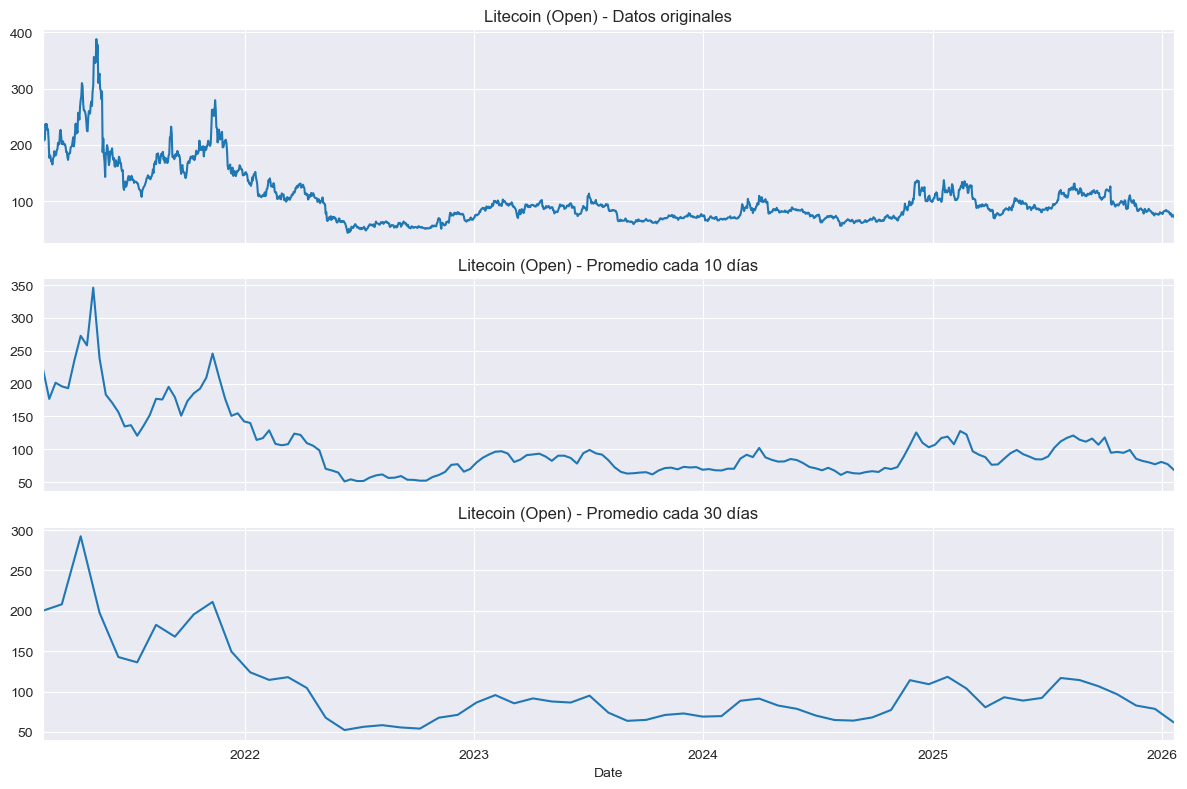

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos
df = yf.download("LTC-USD", period="5y", interval="1d", progress=False)

# Nos quedamos solo con Open
serie_open = df[['Open']].copy()
serie_open.index = pd.to_datetime(serie_open.index)

# Crear figura con 3 subgráficos
fig, ax = plt.subplots(3, sharex=True, figsize=(12,8))

# Últimos 500 días - datos originales
serie_open[:].plot(ax=ax[0], title="Litecoin (Open) - Datos originales", legend=False)

# Resample cada 10 días
serie_open[:].resample('10D').mean().plot(
    ax=ax[1],
    title="Litecoin (Open) - Promedio cada 10 días",
    legend=False
)

# Resample cada 30 días
serie_open[:].resample('30D').mean().plot(
    ax=ax[2],
    title="Litecoin (Open) - Promedio cada 30 días",
    legend=False
)

plt.tight_layout()
plt.show()


In [3]:
serie_open

Price,Open
Ticker,LTC-USD
Date,
2021-02-14,226.285873
2021-02-15,214.324997
2021-02-16,207.610443
2021-02-17,210.569031
2021-02-18,236.949249
...,...
2026-02-10,54.398125
2026-02-11,53.326488


In [4]:
serie_open[:].resample('30D').mean()

Ticker,LTC-USD
Date,
2021-02-14,200.140370
2021-03-16,208.101567
2021-04-15,292.371431
2021-05-15,197.734267
2021-06-14,142.806940
...,...
2025-09-21,106.674248
2025-10-21,96.612793
2025-11-20,82.781630


Como puede ver, el muestreo descendente hace que los datos sean más suaves a medida que aumenta la frecuencia.

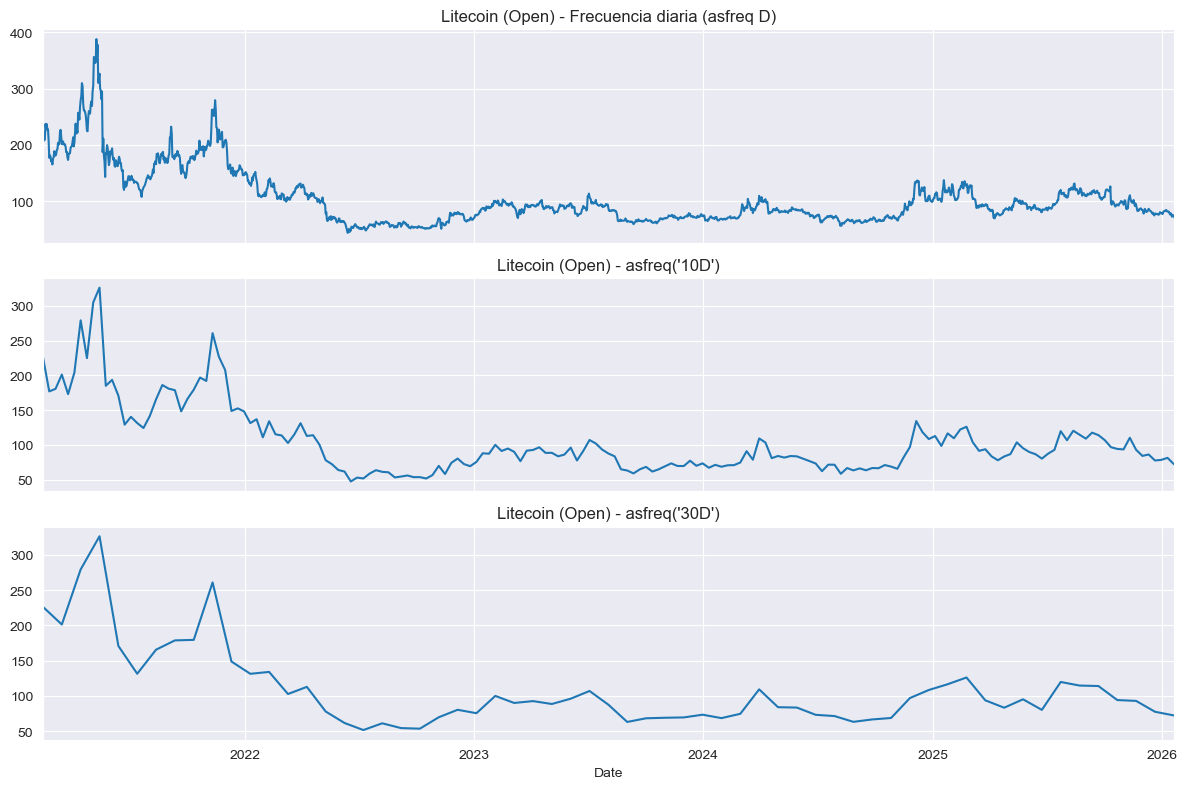

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos
df = yf.download("LTC-USD", period="5y", interval="1d", progress=False)

# Serie Open
serie_open = df[['Open']].copy()
serie_open.index = pd.to_datetime(serie_open.index)

# Asegurar frecuencia diaria explícita
serie_open = serie_open.asfreq('D')

# Crear figura
fig, ax = plt.subplots(3, sharex=True, figsize=(12,8))

# Últimos 500 registros
serie_500 = serie_open[:]

# Serie original con frecuencia diaria
serie_500.plot(ax=ax[0], title="Litecoin (Open) - Frecuencia diaria (asfreq D)", legend=False)

# Convertir a frecuencia cada 10 días (sin agregar)
serie_10d = serie_500.asfreq('10D')
serie_10d.plot(ax=ax[1], title="Litecoin (Open) - asfreq('10D')", legend=False)

# Convertir a frecuencia cada 30 días
serie_30d = serie_500.asfreq('30D')
serie_30d.plot(ax=ax[2], title="Litecoin (Open) - asfreq('30D')", legend=False)

plt.tight_layout()
plt.show()


🔎 Diferencia clave (conceptualmente importante si estás en modo académico):

resample() → agrega (media, suma, etc.)

asfreq() → cambia frecuencia SIN agregar, solo reindexa

In [6]:
serie_500

Ticker,LTC-USD
Date,
2021-02-14,226.285873
2021-02-15,214.324997
2021-02-16,207.610443
2021-02-17,210.569031
2021-02-18,236.949249
...,...
2026-02-10,54.398125
2026-02-11,53.326488
2026-02-12,52.236900


In [7]:
serie_10d

Ticker,LTC-USD
Date,
2021-02-14,226.285873
2021-02-24,176.966766
2021-03-06,180.706329
2021-03-16,201.191208
2021-03-26,173.022186
...,...
2025-12-30,78.276077
2026-01-09,81.247742
2026-01-19,72.263268


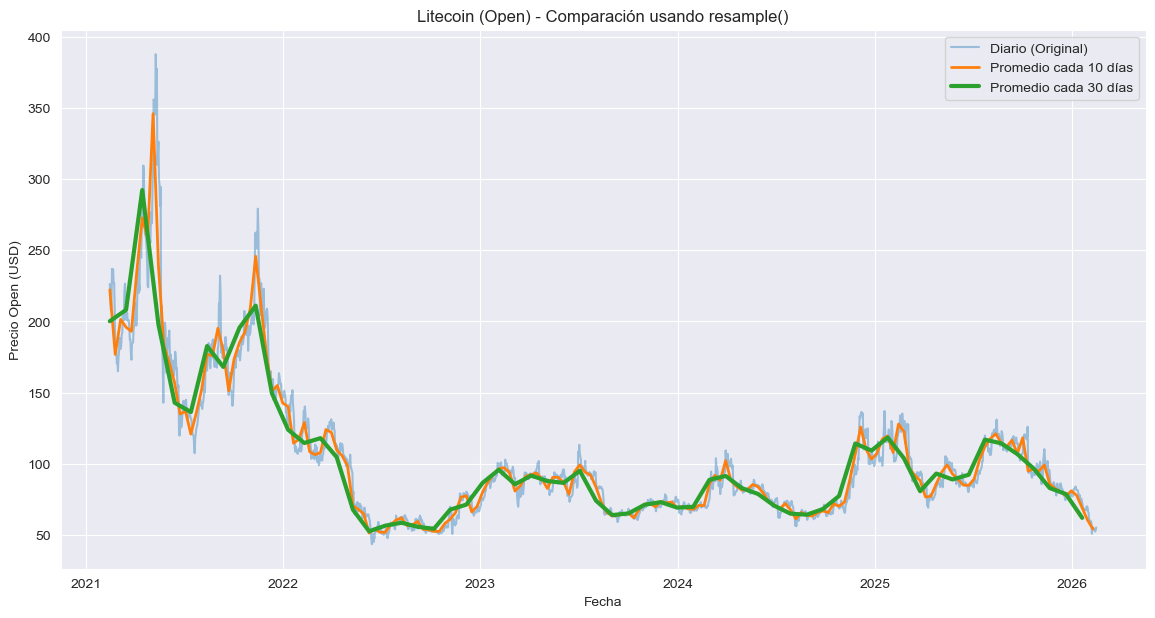

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos
df = yf.download("LTC-USD", period="5y", interval="1d", progress=False)

# Serie Open
serie_open = df[['Open']].copy()
serie_open.index = pd.to_datetime(serie_open.index)

# Resample (agregación por media)
serie_10d = serie_open.resample('10D').mean()
serie_30d = serie_open.resample('30D').mean()

# Graficar todo en un solo eje
plt.figure(figsize=(14,7))

plt.plot(serie_open, label="Diario (Original)", alpha=0.4)
plt.plot(serie_10d, label="Promedio cada 10 días", linewidth=2)
plt.plot(serie_30d, label="Promedio cada 30 días", linewidth=3)

plt.title("Litecoin (Open) - Comparación usando resample()")
plt.xlabel("Fecha")
plt.ylabel("Precio Open (USD)")
plt.legend()
plt.grid(True)
plt.show()


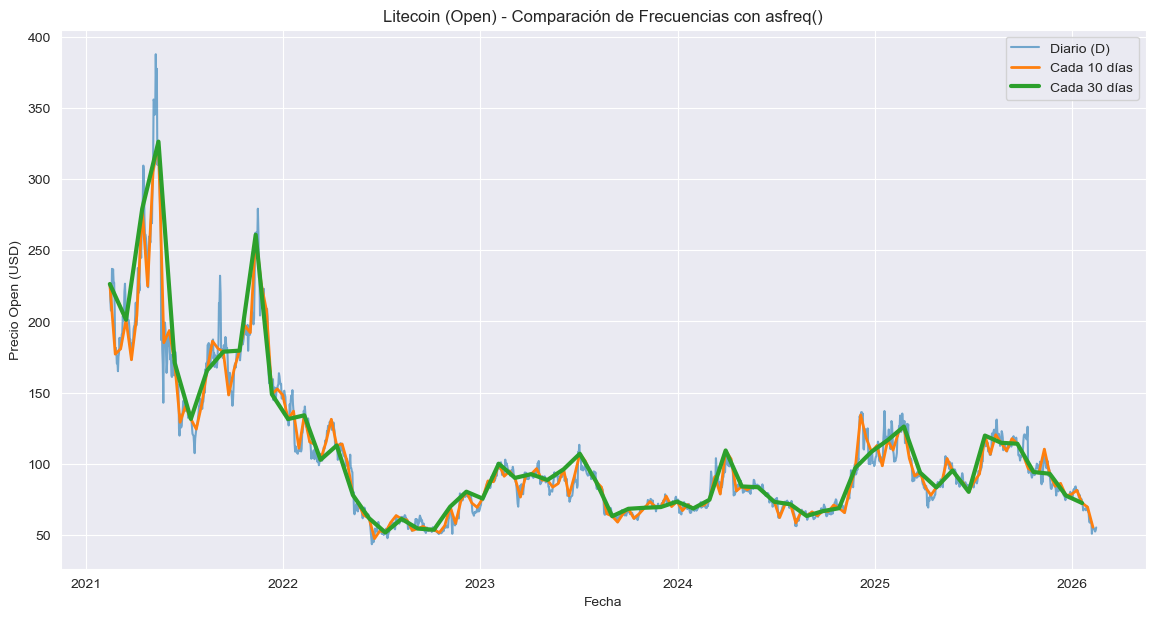

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos
df = yf.download("LTC-USD", period="5y", interval="1d", progress=False)

# Serie Open
serie_open = df[['Open']].copy()
serie_open.index = pd.to_datetime(serie_open.index)

# Asegurar frecuencia diaria explícita
serie_open = serie_open.asfreq('D')

# Submuestreos
serie_10d = serie_open.asfreq('10D')
serie_30d = serie_open.asfreq('30D')

# Graficar todo en un solo eje
plt.figure(figsize=(14,7))

plt.plot(serie_open, label="Diario (D)", alpha=0.6)
plt.plot(serie_10d, label="Cada 10 días", linewidth=2)
plt.plot(serie_30d, label="Cada 30 días", linewidth=3)

plt.title("Litecoin (Open) - Comparación de Frecuencias con asfreq()")
plt.xlabel("Fecha")
plt.ylabel("Precio Open (USD)")
plt.legend()
plt.grid(True)
plt.show()


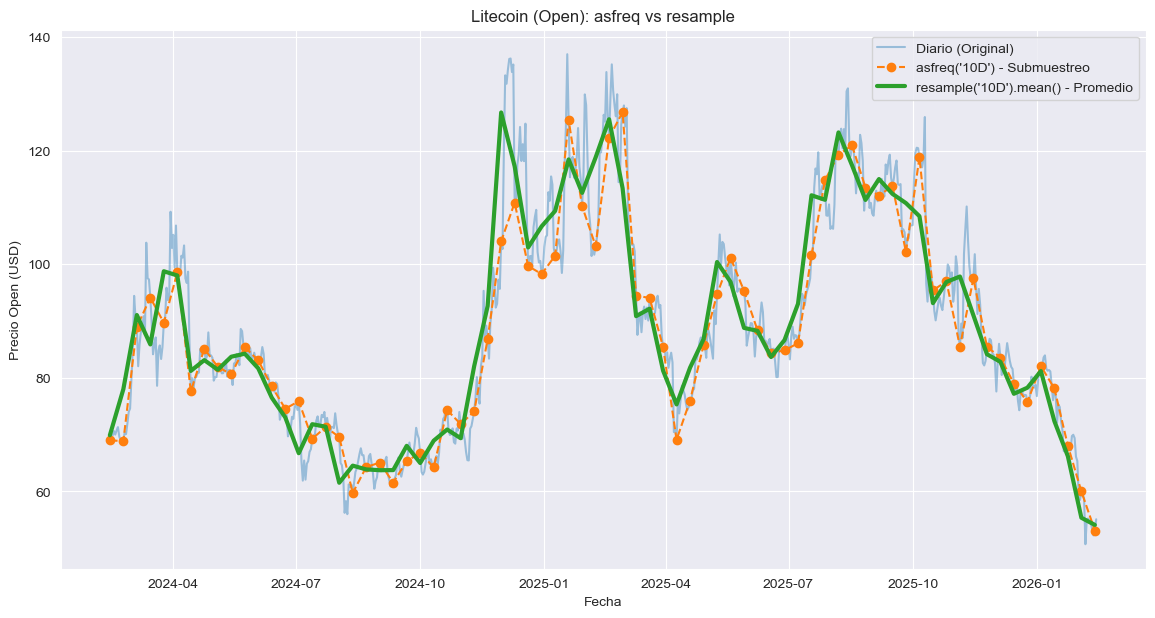

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Descargar datos
df = yf.download("LTC-USD", period="2y", interval="1d", progress=False)

serie = df[['Open']].copy()
serie.index = pd.to_datetime(serie.index)

# Asegurar frecuencia diaria
serie = serie.asfreq('D')

# asfreq (submuestreo)
asfreq_10d = serie.asfreq('10D')

# resample (agregación)
resample_10d = serie.resample('10D').mean()

plt.figure(figsize=(14,7))

plt.plot(serie, label="Diario (Original)", alpha=0.4)
plt.plot(asfreq_10d, marker='o', linestyle='--', label="asfreq('10D') - Submuestreo")
plt.plot(resample_10d, linewidth=3, label="resample('10D').mean() - Promedio")

plt.title("Litecoin (Open): asfreq vs resample")
plt.xlabel("Fecha")
plt.ylabel("Precio Open (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
serie

Price,Open
Ticker,LTC-USD
Date,
2024-02-14,68.999779
2024-02-15,69.896500
2024-02-16,69.814407
2024-02-17,70.616348
2024-02-18,69.990204
...,...
2026-02-10,54.398125
2026-02-11,53.326488


In [12]:
asfreq_10d

Price,Open
Ticker,LTC-USD
Date,
2024-02-14,68.999779
2024-02-24,68.826271
2024-03-05,88.946327
2024-03-15,94.120766
2024-03-25,89.690750
...,...
2026-01-04,82.052773
2026-01-14,78.124405


In [13]:
resample_10d

Price,Open
Ticker,LTC-USD
Date,
2024-02-14,69.872581
2024-02-24,77.992810
2024-03-05,91.056049
2024-03-15,85.875941
2024-03-25,98.766223
...,...
2026-01-04,81.181449
2026-01-14,72.368350


| Característica | asfreq() | resample() |
|---------------|----------|------------|
| ¿Agrega datos? | ❌ No | ✅ Sí |
| ¿Cambia valores? | ❌ No | ✅ Sí (media, suma, etc.) |
| Reduce volatilidad | ❌ No | ✅ Sí |
| Cambia varianza | Poco o nada | Sí, disminuye |
| Útil para | Cambiar frecuencia formal | Suavizar / agregar |
| Riesgo | Perder información | Introducir sesgo de agregación |
| Uso típico | Modelos que requieren frecuencia fija | Análisis de tendencia |


<div style=" font-family: Arial, sans-serif; background-color:rgba(205, 202, 213, 0.2); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">


# 📊 Cambio de Frecuencia en Series de Tiempo

## 📌 Concepto General

Pasar de:

- Semanas → Meses  
- Meses → Trimestres  
- Trimestres → Año  

significa **reducir la frecuencia** (*downsampling*).

Reducir frecuencia implica:

- Agrupar observaciones
- Aplicar una función agregadora (mean, sum, last, etc.)
- Disminuir la cantidad de puntos en la serie

En Pandas se utiliza:

```python
resample()
```

---

## 🔹 Ejemplos de Conversión de Frecuencia

Supongamos que tenemos una serie diaria llamada `serie`.

### 1️⃣ Diario → Semanal

```python
semanal = serie.resample('W').mean()
```

- `'W'` = frecuencia semanal  
- Agrupa cada semana  
- Calcula el promedio semanal  

---

### 2️⃣ Semanal → Mensual

```python
mensual = semanal.resample('M').mean()
```

También puede hacerse directamente desde diario:

```python
mensual = serie.resample('M').mean()
```

- `'M'` = fin de mes  
- Agrupa observaciones dentro del mes  

---

### 3️⃣ Mensual → Trimestral

```python
trimestral = mensual.resample('Q').mean()
```

- `'Q'` = fin de trimestre (Mar, Jun, Sep, Dic)  
- Agrupa 3 meses  

---

### 4️⃣ Trimestral → Anual

```python
anual = trimestral.resample('A').mean()
```

- `'A'` = fin de año  

---

## 📋 Códigos de Frecuencia en Pandas

| Frecuencia   | Código |
|--------------|--------|
| Diario       | `'D'`  |
| Semanal      | `'W'`  |
| Mensual      | `'M'`  |
| Trimestral   | `'Q'`  |
| Anual        | `'A'`  |

---

## 📈 ¿Qué ocurre al reducir frecuencia?

- ✔ Disminuye la volatilidad  
- ✔ Disminuye la varianza  
- ✔ Se pierde información de corto plazo  
- ✔ Se resalta la tendencia estructural  

---

## 🔼 ¿Se puede aumentar frecuencia?

Sí, pero **no crea información nueva**.

Ejemplo: Mensual → Diario

```python
mensual_a_diario = mensual.resample('D').ffill()
```

Esto:

- Replica valores  
- No genera datos reales  
- Solo cambia el calendario  

---

## 🎓 Conclusión

Reducir frecuencia implica:

> Agrupar observaciones y aplicar una función agregadora.

Aumentar frecuencia implica:

> Interpolación o replicación sin nueva información.

La elección depende del objetivo del análisis.


<div style=" font-family: Arial, sans-serif; background-color:rgba(75, 226, 110, 0.2); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

# **Transformaciones que estabilizan la varianza**


De acuerdo a lo visto anteriormente, es necesario contar con herramientas para estabilizar la varianza caso sea no existe homogeneidad en ésta y sea una función con constante del tiempo. 

La herramienta más común y tradicional para estos escenarios es la transformación de **Box-Cox**.



La transformación de **Box-Cox** es un caso general de varias otras transformaciones comunes.

Sea $\{y_t\}$ la serie original, la serie transformada está dada por $\{w_t\}$ donde 

$$
w_t=\begin{cases}
\log(y_t), & \lambda=0, \\
\frac{y_{t}^{\lambda} - 1}{\lambda}, & \lambda\neq 0
\end{cases}
$$

Siempre que $-1\leq\lambda\leq 1$


**Algunos casos particulares de la transformación Box-Cox**

- $\lambda =1 \ \ $  No hay transformación
- $\lambda =\frac{1}{2} \ \ $ raíz cuadrada y transformación lineal
- $\lambda =\frac{1}{3} \ \ $ raíz cúbica y transformación lineal
- $\lambda =0 \ \ $ Logaritmo natural
- $\lambda =-1 \ \ $ Inversa


- Seleccionar los datos positivos: La transformación de Box-Cox solo es aplicable a datos que son estrictamente positivos, por lo que todos los valores deben ser mayores que cero.

- Elegir el valor de $\lambda$: El valor óptimo de $𝜆$λ se suele obtener mediante un procedimiento de máxima verosimilitud o mediante prueba y error. En algunos software, como R o Python, existe una función para encontrar este valor automáticamente.

- Aplicar la transformación: Utilizando la fórmula anterior, transformas tus datos según el valor de 
$𝜆$

Para ejemplificar.

In [14]:
df=pd.read_csv("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/gas.csv",delimiter=";",decimal=",",index_col=0,parse_dates=True )
df

C:\Users\wsand\AppData\Local\Temp\ipykernel_9672\831783019.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/gas.csv",delimiter=";",decimal=",",index_col=0,parse_dates=True )


,x
1,1709
2,1646
3,1794
4,1878
5,2173
...,...
472,49013
473,56624
474,61739
475,66600


In [15]:
Fecha=pd.date_range( start="1956-01-01", periods=len(df),  freq="ME")
Fecha


DatetimeIndex(['1956-01-31', '1956-02-29', '1956-03-31', '1956-04-30',
               '1956-05-31', '1956-06-30', '1956-07-31', '1956-08-31',
               '1956-09-30', '1956-10-31',
               ...
               '1994-11-30', '1994-12-31', '1995-01-31', '1995-02-28',
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31'],
              dtype='datetime64[ns]', length=476, freq='ME')

In [16]:
df["Fecha"]=Fecha
df

,x,Fecha
1,1709,1956-01-31
2,1646,1956-02-29
3,1794,1956-03-31
4,1878,1956-04-30
5,2173,1956-05-31
...,...,...
472,49013,1995-04-30
473,56624,1995-05-31
474,61739,1995-06-30
475,66600,1995-07-31


In [ ]:


df.set_index("Fecha", inplace=True)
z1=df.copy()


In [18]:
z1

,x
Fecha,
1956-01-31,1709
1956-02-29,1646
1956-03-31,1794
1956-04-30,1878
1956-05-31,2173
...,...
1995-04-30,49013
1995-05-31,56624
1995-06-30,61739


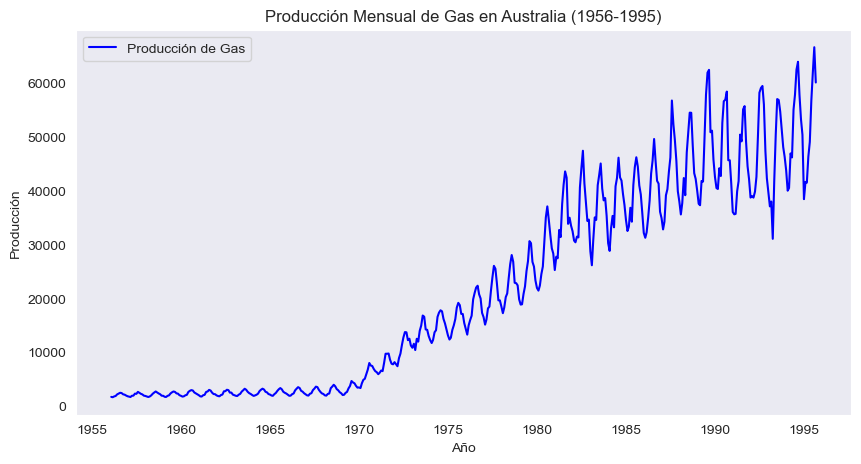

In [21]:

# Graficar la serie
plt.figure(figsize=(10, 5))
plt.plot(z1, color='blue', label="Producción de Gas")
plt.title("Producción Mensual de Gas en Australia (1956-1995)")
plt.xlabel("Año")
plt.ylabel("Producción")
plt.legend()
plt.grid()
plt.show()


Valor óptimo de lambda: 0.1924


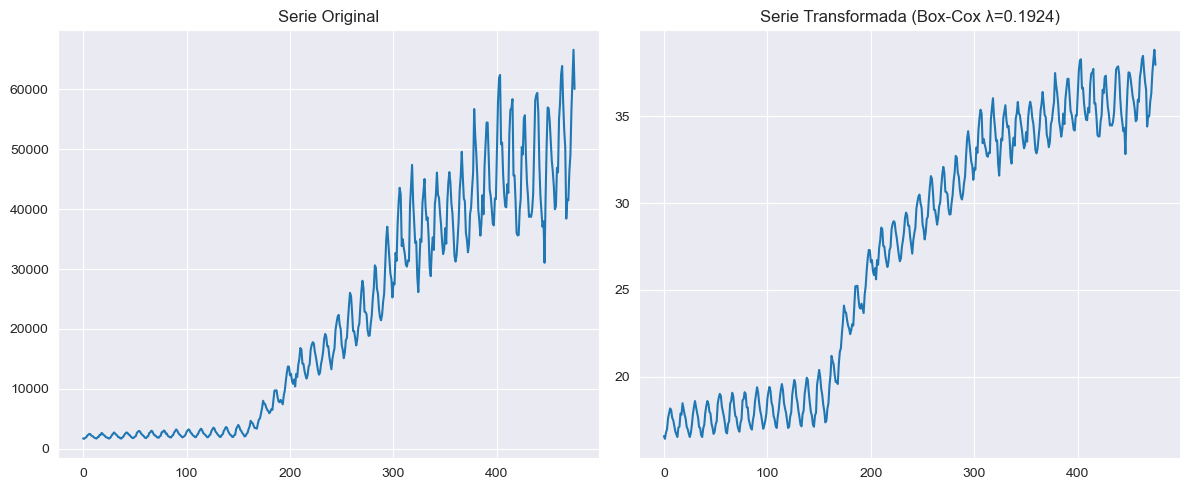

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Asegurarnos que no haya valores <= 0 (Box-Cox requiere positivos)
ts_values = z1.values.flatten()

if np.any(ts_values <= 0):
    ts_values = ts_values - np.min(ts_values) + 1

# Aplicar Box-Cox
ts_boxcox, lambda_opt = boxcox(ts_values)

print(f"Valor óptimo de lambda: {lambda_opt:.4f}")

# Graficar comparación
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(ts_values)
plt.title("Serie Original")

plt.subplot(1,2,2)
plt.plot(ts_boxcox)
plt.title(f"Serie Transformada (Box-Cox λ={lambda_opt:.4f})")

plt.tight_layout()
plt.show()


In [23]:
ts_boxcox

array([16.56774155, 16.41102418, 16.77195284, 16.96622363, 17.59718727,
       17.8879894 , 18.1623607 , 18.06685099, 17.61934235, 17.49121133,
       17.15359884, 16.84448685, 16.66964655, 16.51602862, 17.06073887,
       17.10737171, 17.86881978, 17.80702344, 18.46366638, 18.12582029,
       17.80702344, 17.57696755, 17.10737171, 16.96622363, 16.72223968,
       16.51602862, 16.74597158, 17.20160065, 17.82834452, 18.24011989,
       18.58994231, 18.2598389 , 17.92802947, 17.64140749, 17.08521668,
       17.03838784, 16.61894381, 16.51602862, 17.01369228, 17.22327767,
       17.92802947, 18.31503937, 18.58994231, 18.44465214, 17.96778063,
       17.86881978, 17.29205918, 17.03838784, 16.69600941, 16.82119823,
       17.24702121, 17.42494792, 18.42731059, 18.78239893, 19.001652  ,
       18.88426478, 18.27770509, 17.96778063, 17.68328504, 17.29205918,
       16.79546076, 16.72223968, 17.26851514, 17.42494792, 18.44465214,
       18.58994231, 19.06722831, 18.86660873, 18.20227997, 17.72

In [24]:
s=pd.Series(ts_boxcox)

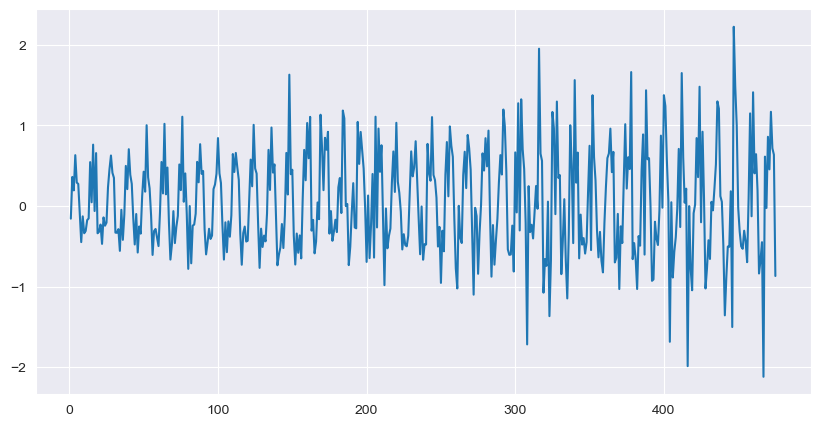

In [25]:
plt.figure(figsize=(10,5))
plt.plot(s.diff(1))
plt.show()

In [26]:
s.diff(1)

0           NaN
1     -0.156717
2      0.360929
3      0.194271
4      0.630964
         ...   
471    0.454543
472    1.169056
473    0.716129
474    0.637447
475   -0.867882
Length: 476, dtype: float64

<div style=" font-family: Arial, sans-serif; background-color:rgba(208, 206, 216, 0.2); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">


# 📅 Efectos de Calendario en Series de Tiempo

En muchas series reales, el comportamiento cambia según el calendario:

- Fines de semana
- Días festivos
- Días hábiles
- Fin de mes
- Inicio de trimestre
- Temporadas específicas

Estos efectos NO son tendencia ni estacionalidad clásica,
son efectos estructurales del calendario.

---

# 🔹 1️⃣ Fines de Semana

Muchos fenómenos cambian sábado y domingo:

- Ventas ↓
- Movilidad ↓
- Accidentes ↑
- Consultas médicas ↓

Podemos crear una variable indicadora:

```python
serie['weekday'] = serie.index.dayofweek
serie['is_weekend'] = serie['weekday'].isin([5,6]).astype(int)
```

0 = día hábil  
1 = fin de semana  

Esto permite modelar el efecto como variable explicativa.

---

# 🔹 2️⃣ Días Festivos

Los festivos pueden alterar la serie.

Ejemplo con Colombia:

```python
import holidays

co_holidays = holidays.Colombia()

serie['is_holiday'] = serie.index.isin(co_holidays).astype(int)
```

Esto crea una variable dummy:

1 = festivo  
0 = no festivo  

---

# 🔹 3️⃣ Número de Días Hábiles por Mes

Al pasar de diario a mensual, los meses no tienen igual número de días.

Esto puede distorsionar análisis.

Ejemplo:

```python
serie_mensual = serie.resample('M').sum()
```

Si la serie es ventas diarias, usar `sum()` es correcto.

Pero si es promedio de precios, usar `mean()` es más adecuado.

---

# 🔹 4️⃣ Efecto Fin de Mes

Algunas variables aumentan al final del mes:

- Pagos
- Compras
- Reportes administrativos

Se puede crear:

```python
serie['is_month_end'] = serie.index.is_month_end.astype(int)
```

---

# 🔹 5️⃣ Efecto Trimestre

```python
serie['is_quarter_end'] = serie.index.is_quarter_end.astype(int)
```

---

# 📊 ¿Por qué es importante?

Si no controlas estos efectos:

- El modelo puede detectar falsa estacionalidad
- Puede inflarse la varianza
- Puede sesgar predicciones

---

# 🎓 Concepto Clave

Efectos de calendario ≠ Tendencia  
Efectos de calendario ≠ Estacionalidad pura  

Son variaciones sistemáticas asociadas a la estructura del calendario.

---

# 📌 Resumen

| Efecto | Cómo modelarlo |
|--------|----------------|
| Fin de semana | Dummy (0/1) |
| Festivos | Dummy (0/1) |
| Fin de mes | Dummy (0/1) |
| Número de días | Ajuste por sum vs mean |
| Trimestre | Dummy (0/1) |

---

En modelado (regresión, ARIMAX, ML), estos efectos se incluyen como variables explicativas.


Price            Open weekday is_weekend is_holiday is_month_end  \
Ticker        LTC-USD                                              
Date                                                               
2024-02-14  68.999779       2          0          0            0   
2024-02-15  69.896500       3          0          0            0   
2024-02-16  69.814407       4          0          0            0   
2024-02-17  70.616348       5          1          0            0   
2024-02-18  69.990204       6          1          0            0   

Price      is_quarter_end days_in_month  
Ticker                                   
Date                                     
2024-02-14              0            29  
2024-02-15              0            29  
2024-02-16              0            29  
2024-02-17              0            29  
2024-02-18              0            29  


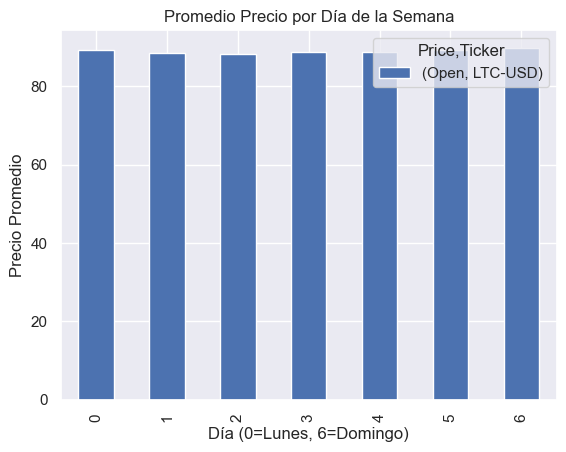


Promedio Día Hábil:
Ticker
LTC-USD    88.825409
dtype: float64

Promedio Fin de Semana:
Ticker
LTC-USD    89.56735
dtype: float64

Promedio No Festivo:
Ticker
LTC-USD    89.037247
dtype: float64

Promedio Festivo:
Ticker
LTC-USD   NaN
dtype: float64


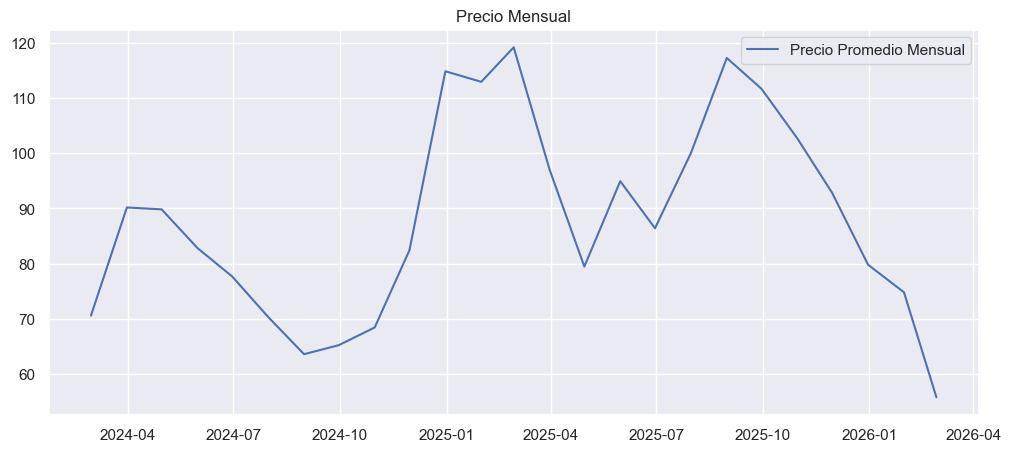

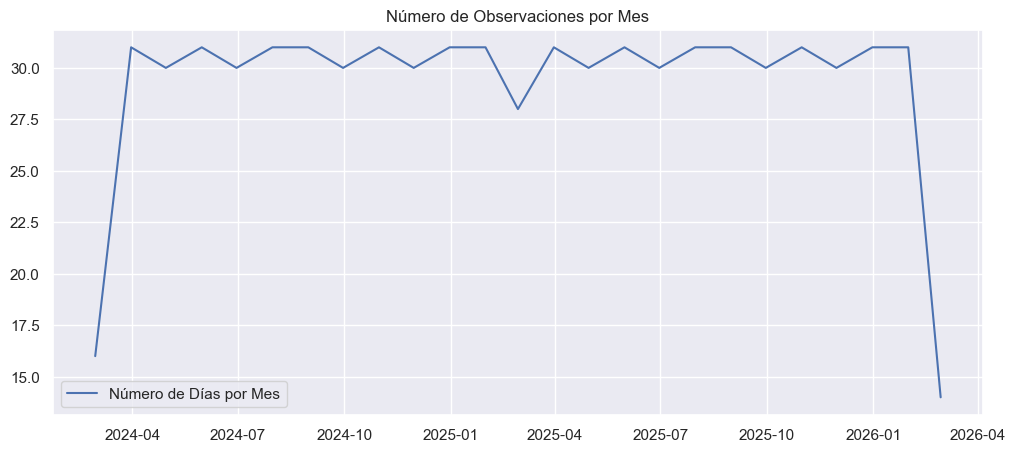

In [44]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import holidays

# ---------------------------------------------------
# 1️⃣ Descargar datos (ejemplo Litecoin)
# ---------------------------------------------------
df = yf.download("LTC-USD", period="2y", interval="1d", progress=False)

serie = df[['Open']].copy()
serie.index = pd.to_datetime(serie.index)
serie = serie.asfreq('D')

# ---------------------------------------------------
# 2️⃣ Variables de Calendario
# ---------------------------------------------------

# Día de la semana (0=Lunes, 6=Domingo)
serie['weekday'] = serie.index.dayofweek

# Fin de semana
serie['is_weekend'] = serie['weekday'].isin([5,6]).astype(int)

# Festivos Colombia
co_holidays = holidays.Colombia()
serie['is_holiday'] = serie.index.isin(co_holidays).astype(int)

# Fin de mes
serie['is_month_end'] = serie.index.is_month_end.astype(int)

# Fin de trimestre
serie['is_quarter_end'] = serie.index.is_quarter_end.astype(int)

# Número de días del mes
serie['days_in_month'] = serie.index.days_in_month

print(serie.head())

# ---------------------------------------------------
# 3️⃣ Visualización: Promedio por día de semana
# ---------------------------------------------------

serie.groupby('weekday')['Open'].mean().plot(kind='bar')
plt.title("Promedio Precio por Día de la Semana")
plt.xlabel("Día (0=Lunes, 6=Domingo)")
plt.ylabel("Precio Promedio")
plt.show()

# ---------------------------------------------------
# 4️⃣ Comparación Fin de Semana vs Día Hábil
# ---------------------------------------------------

print("\nPromedio Día Hábil:")
print(serie[serie['is_weekend']==0]['Open'].mean())

print("\nPromedio Fin de Semana:")
print(serie[serie['is_weekend']==1]['Open'].mean())

# ---------------------------------------------------
# 5️⃣ Comparación Festivo vs No Festivo
# ---------------------------------------------------

print("\nPromedio No Festivo:")
print(serie[serie['is_holiday']==0]['Open'].mean())

print("\nPromedio Festivo:")
print(serie[serie['is_holiday']==1]['Open'].mean())

# ---------------------------------------------------
# 6️⃣ Cambio a mensual correctamente
# ---------------------------------------------------

# Precio promedio mensual
precio_mensual = serie['Open'].resample('ME').mean()

# Conteo de días por mes (ver efecto calendario)
conteo_mensual = serie['Open'].resample('ME').count()

plt.figure(figsize=(12,5))
plt.plot(precio_mensual, label="Precio Promedio Mensual")
plt.title("Precio Mensual")
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(conteo_mensual, label="Número de Días por Mes")
plt.title("Número de Observaciones por Mes")
plt.legend()
plt.show()


In [28]:
serie

Price,Open,weekday,is_weekend,is_holiday,is_month_end,is_quarter_end,days_in_month
Ticker,LTC-USD,,,,,,
Date,,,,,,,
2024-02-14,68.999779,2,0,0,0,0,29
2024-02-15,69.896500,3,0,0,0,0,29
2024-02-16,69.814407,4,0,0,0,0,29
2024-02-17,70.616348,5,1,0,0,0,29
2024-02-18,69.990204,6,1,0,0,0,29
...,...,...,...,...,...,...,...
2026-02-10,54.398125,1,0,0,0,0,28
2026-02-11,53.326488,2,0,0,0,0,28


In [49]:
co_holidays = holidays.Colombia()
co_holidays

holidays.country_holidays('CO')

In [51]:
serie.index

DatetimeIndex(['2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17',
               '2024-02-18', '2024-02-19', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23',
               ...
               '2026-02-05', '2026-02-06', '2026-02-07', '2026-02-08',
               '2026-02-09', '2026-02-10', '2026-02-11', '2026-02-12',
               '2026-02-13', '2026-02-14'],
              dtype='datetime64[ns]', name='Date', length=732, freq='D')

In [58]:
pd.to_datetime(['2025-05-01']).isin(co_holidays)

array([False])

In [50]:
serie.index.isin(co_holidays).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<div style=" font-family: Arial, sans-serif; background-color:rgba(27, 223, 79, 0.2); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

# Manejo de datos perdidos en series temporales

- En el desarrollo teórico de la mayoría de técnicas y modelos no se tienen en cuenta algunas cuestiones que surgen en su aplicación práctica, como es en concreto la existencia de datos faltantes, también denominados perdidos o incompletos.


- Muchas series temporales existentes contienen valores perdidos o no presentes en las observaciones que las componen (ya sean provocados por mediciones incorrectas, errores, etc). Estos valores perdidos crean numerosos problemas y hacen dificil el análisis de los datos, por lo tanto su presencia hace que sea necesaria una etapa de preprocesado de la serie. 
- La manera más simple de tratar con ellos es descartándolos, pero esto solo es posible cuándo son muy pocos los valores perdidos y no tienen influencia en el análisis posterior. Otra forma de lidiar con ellos es realizar el análisis únicamente con los datos disponibles. Pero uno de los métodos más conocidos para tratar con este problema es la imputación.



<div style=" font-family: Arial, sans-serif; background-color:rgba(70, 67, 81, 0.2); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 1.2;">

## **Imputación**

En estadística, la imputación es el proceso de reemplazar los valores perdidos con valores sustitutos. El objetivo de la imputación es rellenar los valores perdidos con estimaciones (realizadas con el método de aprendizaje más apropiado para cada caso) de estos teniendo en cuenta las relaciones posibles entre las observaciones. Luego existen diversos métodos de imputación diferenciados en la forma de estimar los datos faltantes, cuya elección preferible vendrá dada por la naturaleza de la serie:


### **Métodos de imputación simples**

- **Imputación mediante la media:** se reemplazan los valores perdidos por la media de los valores observados.
- **Imputación mediante regresión:** se estima una regresión de las observaciones existentes y se imputa cada valor perdido mediante la ecuación de regresión estimada.

- **Imputación mediante regresión estocástica:** similar al enterior pero se imputa añadiendo a la predicción un valor residual para reestablecer la pérdida de variabilidad.
- **Imputación mediante médias móviles:** se reemplazan las observaciones faltantes por los valores estimados mediante médias móviles.
- **Imputación por Last Observation Carried Forward (locf):** reemplaza el dato perdido por la observacion que le precede.
- **Imputación por interpolación:** se estiman los valores perdidos interpolando (uniendo de manera lineal, polinomial, etc.) el último valor válido antes del valor perdido y el primer valor válido después del valor perdido.


### Métodos de imputación basados en máxima verosimilitud

- **Imputación múltiple:** consiste en realizar varias imputaciones de las observaciones faltantes para luego analizar los conjuntos de datos completados y combinar los resultados obtenidos para obtener una estimacion final. El análisis de imputación múltiple esta dividido en tres fases: fase de imputacion, fase de análisis y fase de puesta en común.

- **Imputación mediante el algoritmo EM (Expectation-Maximization):**
es un algoritmo importante para el análisis de datos faltantes. Es un método iterativo de dos pasos (esperanza y maximizacion) donde se comienza por reemplazar los datos ausentes por unos valores estimados y a continuación se procede a una primera estimación de los parámetros, para con estos parámetros volver a iniciar al primer paso y así sucesivamente hasta que la convergencia de los parámetros sea aceptable.
 
 


## Métodos de imputación basados en machine learning
Imputación con K-Nearest Neighbor: se estiman los valores peridos con la media de los vecinos seleccionados.

- **Imputación con K-means**
- **Imputación con máquinas de soporte vectorial**

En el ámbito de la imputación, la imputación en series temporales univariantes es un reto adicional, debido a que la mayoría de algoritmos complejos están desarrollados para series temporales multivariantes ya que dependen de la correlación entre los inter-atributos para estimar los valores de los datos perdidos (imputación múltiple, EM, kNN, etc.), algo que no ocurre en el caso univariante (al ser un único atributo). Pero además de los métodos simples, también hay posibilidades adicionales más complejas para la imputación en series temporales univariantes:

- **Algoritmos multivariantes con datos retardados:** consisten en emplear indirectamente los algoritmos de series multivariantes en series univariantes empleando el tiempo (variable implícita de una serie temporal) como un atributo más. La forma habitual de hacer esto es mediante lags (variables que toman el valor de otra variable en un instante de tiempo previo) y leads (toman el valor de otra variable en un instante de tiempo posterior).

- **Filtro de Kalman con modelos ARIMA de espacio de estados:** todos los modelos ARIMA pueden ser reescritos (y estimados) como modelos en el espacio de estados. Estos modelos en el espacio de estados pueden entre otras muchas cosas estimar observaciones perdidas. Luego los principales beneficios de representar sistemas dinámicos en forma de espacio de estados es que el espacio de estados permite que las variables no observadas puedan ser incorporadas y estimadas junto con el modelo observable, y que además, estos modelos en el espacio de estados pueden ser analizados usando un algoritmo recursivo llamado filtro de Kalman (Kalman filter), que es usado, entre otras cosas, para determinar las estimaciones óptimas de los modelos en el espacio de estados.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos de AirPassengers
from statsmodels.datasets import get_rdataset
air_passengers = get_rdataset('AirPassengers', cache=True).data
air_passengers


,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [30]:
date=pd.date_range(start="1949-01-01", end="1960-12-31", freq="ME")

In [60]:
air_passengers.index=date
air_passengers.drop(columns=["time"], axis=1, inplace=True)
air_passengers

,value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


In [61]:

# Crear la serie y agregar valores NaN
serie = air_passengers['value'].copy()
serie.iloc[[4, 9, 69, 109, 134]] = np.nan  
serie


1949-01-31    112.0
1949-02-28    118.0
1949-03-31    132.0
1949-04-30    129.0
1949-05-31      NaN
              ...  
1960-08-31    606.0
1960-09-30    508.0
1960-10-31    461.0
1960-11-30    390.0
1960-12-31    432.0
Freq: ME, Name: value, Length: 144, dtype: float64

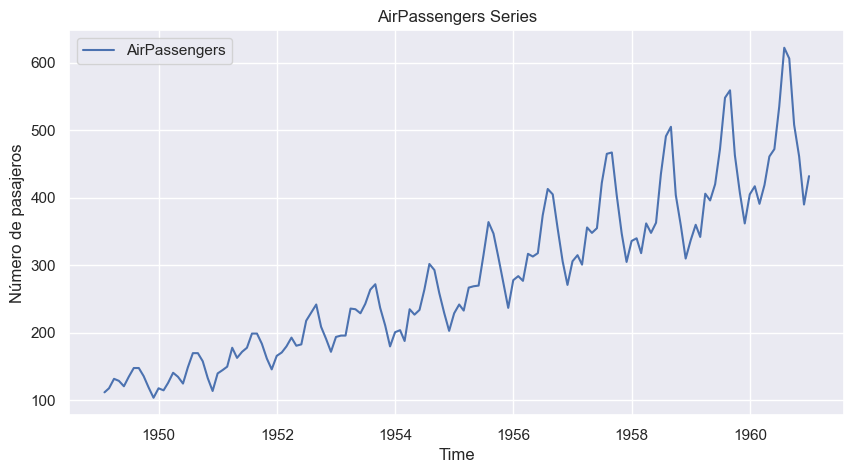

In [62]:


import seaborn as sns
sns.set_theme()


# Visualización de la serie original
plt.figure(figsize=(10, 5))
plt.plot( air_passengers['value'], label='AirPassengers')
plt.title('AirPassengers Series')
plt.xlabel('Time')
plt.ylabel('Número de pasajeros')
plt.legend()
plt.show()


In [63]:


# Imputación de los valores NaN usando la media
serie_filled = serie.fillna(serie.mean())
serie_filled

# Combinar ambas series en un DataFrame
serie_combined = pd.DataFrame({'Original': air_passengers['value'], 'Imputed': serie_filled})
serie_combined


,Original,Imputed
1949-01-31,112,112.000000
1949-02-28,118,118.000000
1949-03-31,132,132.000000
1949-04-30,129,129.000000
1949-05-31,121,281.705036
...,...,...
1960-08-31,606,606.000000
1960-09-30,508,508.000000
1960-10-31,461,461.000000
1960-11-30,390,390.000000


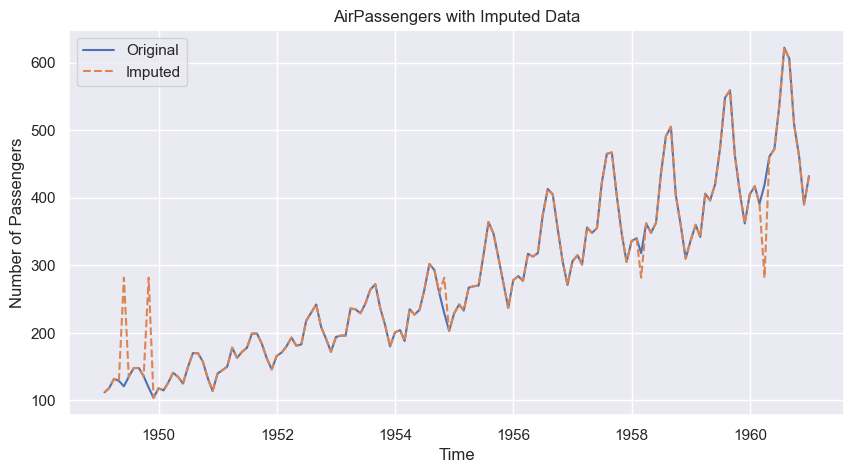

In [64]:


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(serie_combined['Original'], label='Original')
plt.plot(serie_combined['Imputed'], label='Imputed', linestyle='--')
plt.title('AirPassengers with Imputed Data')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


In [65]:


### Imputación de valores perdidos mediante médias móviles:

from statsmodels.tsa.api import SimpleExpSmoothing

# Imputación usando un promedio móvil exponencial con ventana de 3
serie_filled_exp = serie.fillna(serie.ewm(span=3, adjust=False).mean())
serie_filled_exp


1949-01-31    112.00
1949-02-28    118.00
1949-03-31    132.00
1949-04-30    129.00
1949-05-31    126.25
               ...  
1960-08-31    606.00
1960-09-30    508.00
1960-10-31    461.00
1960-11-30    390.00
1960-12-31    432.00
Freq: ME, Name: value, Length: 144, dtype: float64

In [66]:

# Combinar ambas series en un DataFrame
serie_combined_exp = pd.DataFrame({'Original': air_passengers['value'], 'Imputed_Exp': serie_filled_exp})
serie_combined_exp


,Original,Imputed_Exp
1949-01-31,112,112.00
1949-02-28,118,118.00
1949-03-31,132,132.00
1949-04-30,129,129.00
1949-05-31,121,126.25
...,...,...
1960-08-31,606,606.00
1960-09-30,508,508.00
1960-10-31,461,461.00
1960-11-30,390,390.00


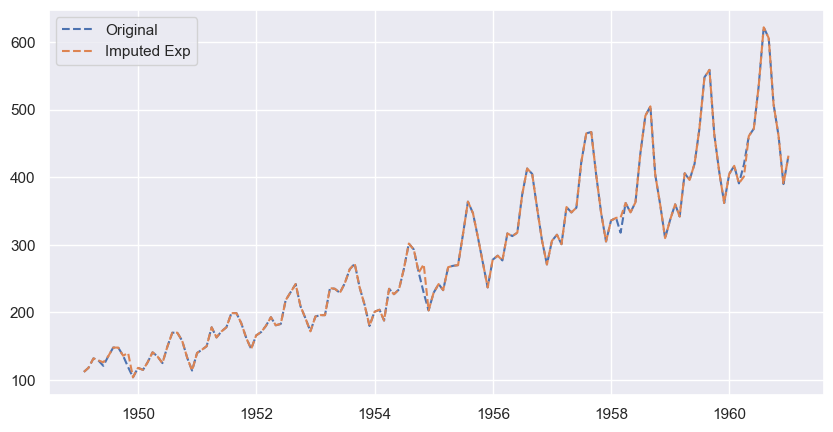

In [67]:

plt.figure(figsize=(10, 5))
plt.plot(serie_combined_exp['Original'], label='Original', linestyle='--')
plt.plot(serie_combined_exp['Imputed_Exp'], label='Imputed Exp', linestyle='--')
plt.legend()
plt.show()


In [68]:

# Imputación utilizando el último valor observado (LOCF - Last Observation Carried Forward)
serie_locf = serie.copy()
serie_locf.ffill(inplace=True)  # Método para rellenar hacia adelante en pandas
print(serie_locf)


serie_combined_locf = pd.DataFrame({'Original': air_passengers['value'], 'Imputed_LOCF': serie_locf})
serie_combined_locf


1949-01-31    112.0
1949-02-28    118.0
1949-03-31    132.0
1949-04-30    129.0
1949-05-31    129.0
              ...  
1960-08-31    606.0
1960-09-30    508.0
1960-10-31    461.0
1960-11-30    390.0
1960-12-31    432.0
Freq: ME, Name: value, Length: 144, dtype: float64


,Original,Imputed_LOCF
1949-01-31,112,112.0
1949-02-28,118,118.0
1949-03-31,132,132.0
1949-04-30,129,129.0
1949-05-31,121,129.0
...,...,...
1960-08-31,606,606.0
1960-09-30,508,508.0
1960-10-31,461,461.0
1960-11-30,390,390.0


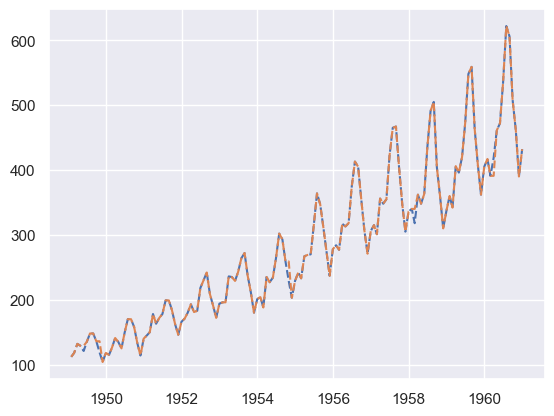

In [69]:


plt.plot(serie_combined_locf['Original'],  label='Original', linestyle ='--')
plt.plot(serie_combined_locf['Imputed_LOCF'], label='Imputed', linestyle='--')
plt.show()


1949-01-31    112.0
1949-02-28    118.0
1949-03-31    132.0
1949-04-30    129.0
1949-05-31    132.0
              ...  
1960-08-31    606.0
1960-09-30    508.0
1960-10-31    461.0
1960-11-30    390.0
1960-12-31    432.0
Freq: ME, Name: value, Length: 144, dtype: float64


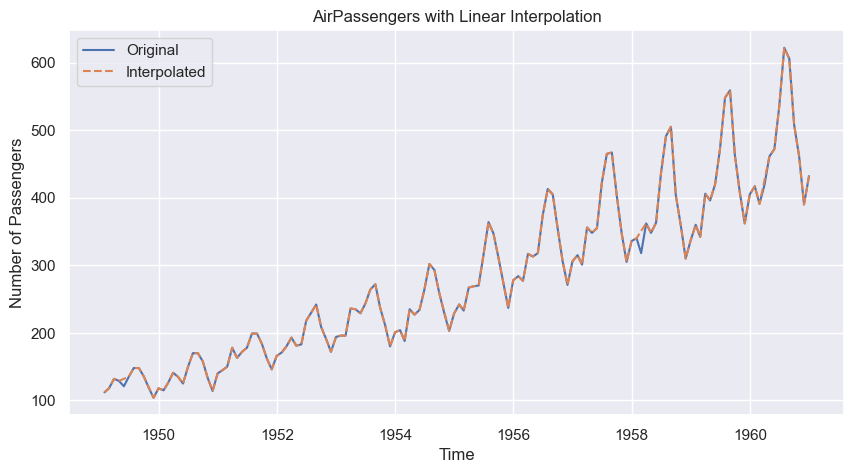

In [70]:

# Imputación utilizando interpolación lineal
serie_interpolated = serie.interpolate(method='linear')
print(serie_interpolated)


# Combinar ambas series en un DataFrame
serie_combined_interp = pd.DataFrame({'Original': air_passengers['value'], 'Interpolated': serie_interpolated})

# Visualización de la serie interpolada
plt.figure(figsize=(10, 5))
plt.plot(serie_combined_interp['Original'], label='Original')
plt.plot(serie_combined_interp['Interpolated'], label='Interpolated', linestyle='--')
plt.title('AirPassengers with Linear Interpolation')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


In [71]:
#%pip install pykalman

from statsmodels.tsa.arima.model import ARIMA

# Crear un modelo ARIMA para imputación
modelo_arima = ARIMA(serie, order=(1, 1, 0)).fit()
serie_arima = serie.copy()
serie_arima = serie_arima.fillna(modelo_arima.predict(start=0, end=len(serie_arima) - 1))


print(serie_arima)


# Combinar ambas series en un DataFrame
serie_combined_arima = pd.DataFrame({'Original': air_passengers['value'], 'ARIMA': serie_arima})
serie_combined_arima


1949-01-31    112.00000
1949-02-28    118.00000
1949-03-31    132.00000
1949-04-30    129.00000
1949-05-31    128.08754
                ...    
1960-08-31    606.00000
1960-09-30    508.00000
1960-10-31    461.00000
1960-11-30    390.00000
1960-12-31    432.00000
Freq: ME, Name: value, Length: 144, dtype: float64


,Original,ARIMA
1949-01-31,112,112.00000
1949-02-28,118,118.00000
1949-03-31,132,132.00000
1949-04-30,129,129.00000
1949-05-31,121,128.08754
...,...,...
1960-08-31,606,606.00000
1960-09-30,508,508.00000
1960-10-31,461,461.00000
1960-11-30,390,390.00000


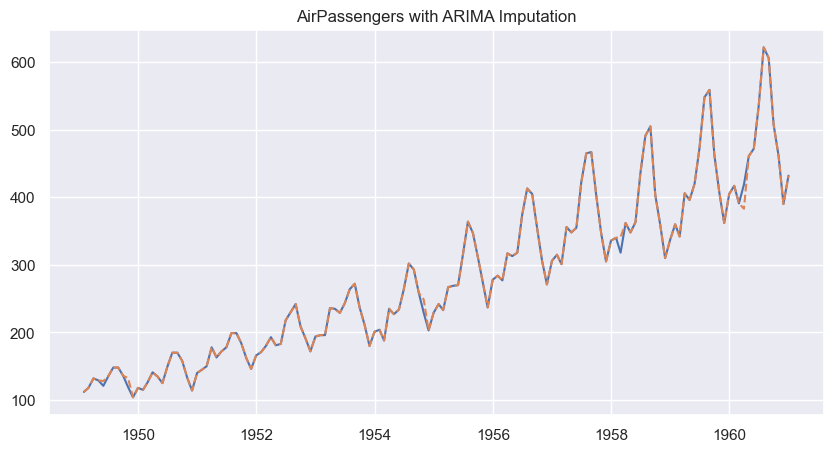

In [43]:

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(serie_combined_arima['Original'], label='Original')
plt.plot(serie_combined_arima['ARIMA'], label='Imputed', linestyle='--')
plt.title('AirPassengers with ARIMA Imputation')
plt.show()